# Run this to use the tarfile and os module to extract .tar data

In [1]:
import tarfile
import os

In [2]:
os.listdir(os.getcwd())

['iccv09Data',
 '.git',
 '.ipynb_checkpoints',
 'logs',
 'weights',
 'LICENSE',
 'README.md',
 'iccv09Data.tar.gz',
 'data_exploration.ipynb',
 '.gitignore',
 'pictures',
 'Plotting acc val.ipynb']

In [3]:
data_path = os.path.join(os.getcwd(), 'iccv09Data.tar.gz')

In [4]:
data = tarfile.open(data_path, mode = 'r')

In [5]:
data.extractall()

# Data Visualization
## Some notes:
README FOR ICCV09DATA

This dataset contains 715 images sourced from LabelMe, MSRC, PASCAL
VOC, and Geometric Context. Labels were obtained using Amazon's
Mechanical Turk (AMT). The labels are:

  - horizons.txt         : image dimensions and location of horizon
  - labels/*.regions.txt : integer matrix indicating each pixel's
                           semantic class (sky, tree, road, grass,
                           water, building, mountain, or foreground
                           object). A negative number indicates
                           unknown.
 - labels/*.surfaces.txt : integer matrix indicating each pixel's
                           geometric class (sky, horizontal, or
                           vertical).
 - labels/*.layers.txt   : integer matrix indicating distinct
                           image regions.

If you use this data, please cite our ICCV 2009 paper:

 - Decomposing a Scene into Geometric and Semantically Consistent Regions
   Stephen Gould, Richard Fulton, Daphne Koller, ICCV 2009

Stephen Gould
sgould@stanford.edu

In [3]:
%matplotlib notebook
# %matplotlib inline
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
os.listdir(os.getcwd())

['iccv09Data',
 '.git',
 '.ipynb_checkpoints',
 'logs',
 'weights',
 'LICENSE',
 'README.md',
 'iccv09Data.tar.gz',
 'data_exploration.ipynb',
 '.gitignore',
 'pictures',
 'Plotting acc val.ipynb']

In [5]:
data_path = os.path.join(os.getcwd(),'iccv09Data')
image_path = os.path.join(data_path, 'images')
label_path = os.path.join(data_path, 'labels')

In [6]:
all_imgs = []
all_regions = []
all_surfaces = []
all_layers = []

for i in os.listdir(image_path):
    all_imgs.append(os.path.join(image_path, i))

for i in os.listdir(label_path):
    if 'surfaces.txt' in i:
        all_surfaces.append(os.path.join(label_path, i))
    elif 'regions.txt' in i:
        all_regions.append(os.path.join(label_path, i))
    elif 'layers.txt' in i:
        all_layers.append(os.path.join(label_path, i))
    else:
        print('Error. funny file named: ', i)

all_imgs.sort()
all_regions.sort()
all_surfaces.sort()
all_layers.sort()
print(len(all_imgs))
print(len(all_regions))
print(len(all_surfaces))
print(len(all_layers))

715
715
715
715


In [7]:
def convert_to_csv(file):
    numbers_we_care = ['0','1','2','3','4','5','6','7','8','9','10']
    temp = []
    for i in file.readlines():
        for j in i:
            if j in numbers_we_care:
                temp.append(int(j))
    temp = np.array(temp)
    return temp

In [8]:
# image_num = 27
image_num = np.random.randint(0,715)
img = all_imgs[image_num]
tag_num = img.split('/')[-1].split('.')[0]
print(tag_num)
reg = all_regions[image_num]
surf = all_surfaces[image_num]
lay = all_layers[image_num]

print(img)
print(reg)
print(surf)
print(lay)

reg = open(reg, 'r')
reg = convert_to_csv(reg)
reg = reg.reshape(plt.imread(img).shape[:2])

surf = open(surf, 'r')
surf = convert_to_csv(surf)
surf = surf.reshape(plt.imread(img).shape[:2])

# lay = open(lay, 'r')
# lay = convert_to_csv(lay)
# lay = lay.reshape(plt.imread(img).shape[:2])

6000199
/home/renjie/Documents/GitHub/my_unet/iccv09Data/images/6000199.jpg
/home/renjie/Documents/GitHub/my_unet/iccv09Data/labels/6000199.regions.txt
/home/renjie/Documents/GitHub/my_unet/iccv09Data/labels/6000199.surfaces.txt
/home/renjie/Documents/GitHub/my_unet/iccv09Data/labels/6000199.layers.txt


<IPython.core.display.Javascript object>


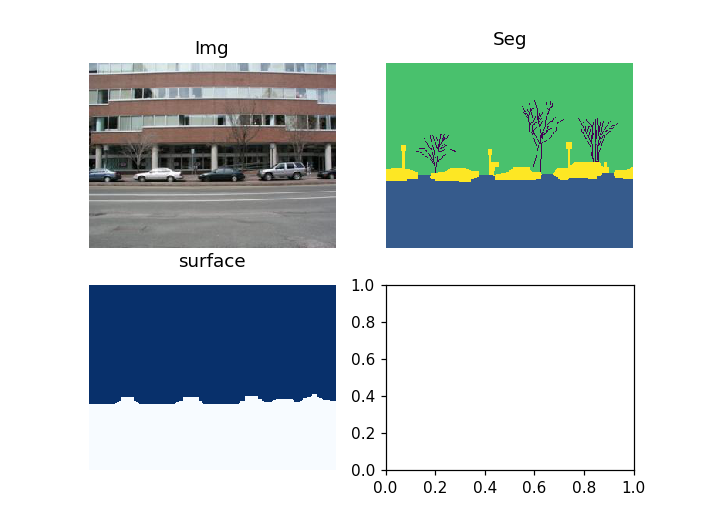

Text(0.5,1.05,'surface')

In [9]:
fig, ax = plt.subplots(2,2)
ax[0,0].imshow(plt.imread(img))
ax[0,0].set_axis_off()
ax[0,0].set_title('Img')

ax[0,1].matshow(reg)
ax[0,1].set_axis_off()
ax[0,1].set_title('Seg')

ax[1,0].matshow(surf, cmap = plt.cm.Blues)
ax[1,0].set_axis_off()
ax[1,0].set_title('surface')

# Preparing Training Data

In [10]:
train_imgs = []
train_regions = []

for i in range(len(all_imgs)):
    test = plt.imread(all_imgs[i])
    if test.shape == (240,320,3):
#         train_imgs.append(all_imgs[i])
        train_imgs.append(plt.imread(all_imgs[i]))
        train_regions.append(all_regions[i])

print(len(train_imgs))
print(len(train_regions))

531
531


image_num:  245


<IPython.core.display.Javascript object>


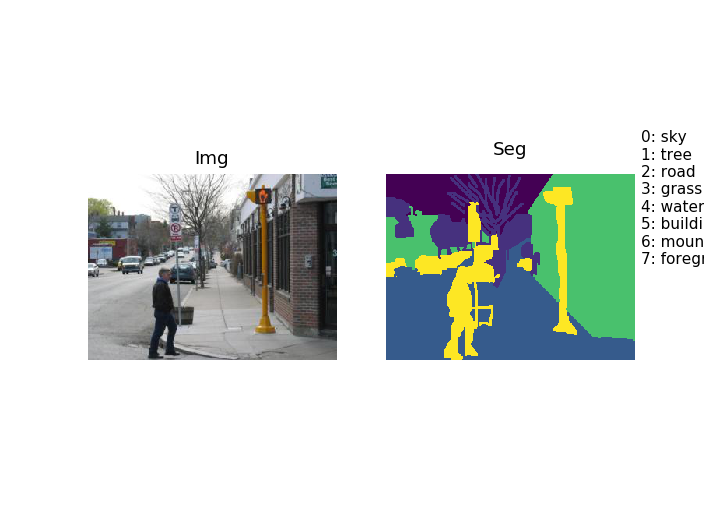

Text(0.91,0.5,'0: sky \n1: tree \n2: road\n3: grass\n4: water\n5: building\n6: mountain\n7: foreground')

In [11]:
image_num = np.random.randint(0,531)
# image_num = 0
print('image_num: ', image_num)
# print(train_imgs[image_num])
# print(train_regions[image_num])
fig, ax = plt.subplots(1,2)

ax[0].imshow((train_imgs[image_num]))
ax[0].set_axis_off()
ax[0].set_title('Img')

reg = convert_to_csv(open(train_regions[image_num], 'r')).reshape(240,320)
ax[1].matshow(reg)
ax[1].set_axis_off()
ax[1].set_title('Seg')

text = '0: sky \n1: tree \n2: road\n3: grass\n4: water\n5: building\n6: mountain\n7: foreground'
fig.text(0.91,0.5,text)


In [12]:
from keras.utils import to_categorical

all_imgs = np.array(train_imgs)
all_masks = []
for i in train_regions:
    all_masks.append(convert_to_csv(open(i, 'r')).reshape(240,320))
all_masks = np.array(all_masks)
all_masks_oneHot = to_categorical(all_masks, 8)
print(all_imgs.shape)
print(all_masks_oneHot.shape)



# Checking code
# mask = mask.reshape(())
# for lay in range(mask[0].shape[-1]):
#     masks_layers = first_masks_onehot[:,:,lay]
#     print("layer num: ", text.split('\n')[lay])
#     print(masks_layers.shape)
#     plt.matshow(masks_layers)

/home/renjie/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(531, 240, 320, 3)
(531, 240, 320, 8)


# UNet

In [13]:
import keras
from keras.models import Model
from keras.layers import Conv2D, UpSampling2D, MaxPooling2D, Dropout, Cropping2D, Input, merge
from keras.optimizers import SGD, Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard
from keras import backend as keras # want the Keras modules to be compatible 

def UNet(filters_dims, activation='relu', kernel_initializer='glorot_uniform', padding='same'):
    inputs = Input((240, 320, 3))
    new_inputs = inputs
    conv_layers = []
    # Encoding Phase
    print("Encoding Phase")
    for i in range(len(filters_dims) - 1):
        print("Stage :", i+1)
        print("========================================")
        print(new_inputs.shape)
        conv = Conv2D(filters_dims[i], 3, activation=activation, padding=padding,
                      kernel_initializer=kernel_initializer)(new_inputs)
        conv = Conv2D(filters_dims[i], 3, activation=activation, padding=padding,
                      kernel_initializer=kernel_initializer)(conv)
        conv_layers.append(conv)
        new_inputs = MaxPooling2D(pool_size=(2, 2))(conv)
        print(new_inputs.shape)
        # op = BatchNormalization()(op)

    # middle phase
    print("middle phase")
    print("========================================")
    conv = Conv2D(filters_dims[-1], 3, activation=activation, padding=padding,
                  kernel_initializer=kernel_initializer)(new_inputs)
    conv = Conv2D(filters_dims[-1], 3, activation=activation, padding=padding,
                  kernel_initializer=kernel_initializer)(conv)
    new_inputs = Dropout(0.5)(conv)
    print(new_inputs.shape)

    filters_dims.reverse()
    conv_layers.reverse()

    # Decoding Phase
    print("Decoding Phase")
    for i in range(1, len(filters_dims)):
        print(i)
        print("========================================")

        print(new_inputs.shape)
        up = Conv2D(filters_dims[i], 3, activation=activation, padding=padding,
                    kernel_initializer=kernel_initializer)(UpSampling2D(size=(2, 2))(new_inputs))
        concat = merge([conv_layers[i-1], up], mode='concat', concat_axis=3)
        conv = Conv2D(filters_dims[i], 3, activation=activation, padding=padding,
                      kernel_initializer=kernel_initializer)(concat)
        new_inputs = Conv2D(filters_dims[i], 3, activation=activation, padding=padding,
                            kernel_initializer=kernel_initializer)(conv)
        print(new_inputs.shape)
    outputs = Conv2D(8, 1, activation='softmax', padding='same',
                     kernel_initializer='glorot_uniform')(new_inputs)
    print(outputs.shape)
    model = Model(input=inputs, output=outputs, name='UNet')
    model.compile(optimizer=Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [14]:
filters_dims = [64, 128, 256, 512]
model_1 = UNet(filters_dims)

Encoding Phase
Stage : 1
(?, 240, 320, 3)
(?, 120, 160, 64)
Stage : 2
(?, 120, 160, 64)
(?, 60, 80, 128)
Stage : 3
(?, 60, 80, 128)
(?, 30, 40, 256)
middle phase
(?, 30, 40, 512)
Decoding Phase
1
(?, 30, 40, 512)


/home/renjie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
/home/renjie/anaconda3/lib/python3.6/site-packages/keras/legacy/layers.py:465: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)
/home/renjie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: Update your `Model` call to the Keras 2 API: `Model(name="UNet", inputs=Tensor("in..., outputs=Tensor("co...)`


(?, 60, 80, 256)
2
(?, 60, 80, 256)
(?, 120, 160, 128)
3
(?, 120, 160, 128)
(?, 240, 320, 64)
(?, 240, 320, 8)


In [19]:
# filters_dims = [64, 128, 256, 512,1024]
# model_2 = UNet(filters_dims)

In [15]:
def train(model):
    
    batchSz = 2
    num_epochs = 1
    print("Getting data.. Image shape: {}. Masks shape : {}".format(all_imgs.shape,
                                                                         all_masks.shape))
    print("The data will be split to Train Val: 80/20")
#     split_index = round(len(all_imgs)*0.8)
#     train_img = all_imgs[:split_index]
#     test_img = all_imgs[split_index:]
#     train_mask = all_masks[:split_index]
#     test_mask = all_masks[split_index:]
    
#     assert (len(train_img) + len(test_img)) == len(all_imgs)
#     assert (len(train_mask) + len(test_mask)) == len(all_masks)
    
#     print("Training image: ", train_img.shape)
#     print("Training mask: ", train_mask.shape)
#     print("Testing image: ", test_img.shape)
#     print("Testing image: ", test_mask.shape)
    
    
    filepath = 'weights/' + model.name + '.{epoch:02d}-{loss:.2f}.hdf5'
    checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_weights_only=True, save_best_only=True, mode='auto', period=1)
    tensor_board = TensorBoard(log_dir='logs/', histogram_freq=1, batch_size=batchSz,
                              write_grads=True, write_images=True)
    history = model.fit(x=all_imgs, y=all_masks_oneHot, batch_size=batchSz, epochs=num_epochs, verbose=1, callbacks=[checkpoint, tensor_board], validation_split=0.2)
    
    return history
    

In [ ]:
# Training

results = train(model_2)

Getting data.. Image shape: (531, 240, 320, 3). Masks shape : (531, 240, 320)
The data will be split to Train Val: 80/20
Train on 424 samples, validate on 107 samples
Epoch 1/1
 50/424 [==>...........................] - ETA: 1:14:34 - loss: 2.9502 - acc: 0.2852

# For GIFs

In [16]:
weights_path = os.path.join(os.getcwd(),'weights')
weights_path_forgif = os.path.join(weights_path, 'for_gif')

list_of_weights = os.listdir(weights_path_forgif)
list_of_weights.sort()
list_of_weights

['UNet-4Stage.01-2.91.hdf5',
 'UNet-4Stage.02-1.32.hdf5',
 'UNet-4Stage.03-1.11.hdf5',
 'UNet-4Stage.04-1.06.hdf5',
 'UNet-4Stage.05-1.01.hdf5',
 'UNet-4Stage.06-0.97.hdf5',
 'UNet-4Stage.07-0.92.hdf5',
 'UNet-4Stage.08-0.91.hdf5',
 'UNet-4Stage.09-0.88.hdf5',
 'UNet-4Stage.10-0.85.hdf5',
 'UNet-4Stage.10-0.87.hdf5',
 'UNet-4Stage.20-0.70.hdf5',
 'UNet-4Stage.30-0.56.hdf5',
 'UNet-4Stage.40-0.44.hdf5',
 'UNet-4Stage.50-0.29.hdf5']

In [17]:
image_num = np.random.randint(0,len(all_imgs))
print("image num: ", image_num)

image num:  57


In [18]:
weights_num = 0
print(list_of_weights[weights_num])
model_1.load_weights(os.path.join(weights_path_forgif, list_of_weights[weights_num]))

UNet-4Stage.01-2.91.hdf5


In [19]:
pred1 = model_1.predict(all_imgs[image_num:image_num+1])[0]

combined_pred1 = np.zeros(pred1.shape[:-1])
for lays in range(pred1.shape[-1]):
    combined_pred1 += np.round(pred1[:,:,lays])* lays

In [110]:
epoch = str(list_of_weights[weights_num].split(".")[1].split("-")[0])
loss = str(list_of_weights[weights_num].split(".")[1].split("-")[1] + "." + list_of_weights[weights_num].split(".")[2])

print(epoch)
print(loss)

01
2.91


In [20]:
# for plotting (layers analysis)
img = all_imgs[image_num]
mask = all_masks[image_num]
lay = 1
fig, ax = plt.subplots(2,2)

ax[0,0].imshow((img))
ax[0,0].set_axis_off()
ax[0,0].set_title('Img')

ax[0,1].matshow(mask)
ax[0,1].set_axis_off()
ax[0,1].set_title('Ground Truth Seg')

ax[1,0].matshow(combined_pred1)
ax[1,0].set_axis_off()
ax[1,0].set_title('Pred Seg model1')

ax[1,1].set_axis_off()

text = '0: sky \n1: tree \n2: road\n3: grass\n4: water\n5: building\n6: mountain\n7: foreground'
fig.text(0.65,0.1,text)
fig.text(0.7,0.37,"Loss: {}".format(loss))
fig.text(0.65,0.4,"Epoch: {}".format(epoch),fontsize=20, fontweight='bold')

fig.savefig("result_epoch1.png")

<IPython.core.display.Javascript object>

NameError: name 'loss' is not defined

UNet-4Stage.01-2.91.hdf5
01
2.91


<IPython.core.display.Javascript object>


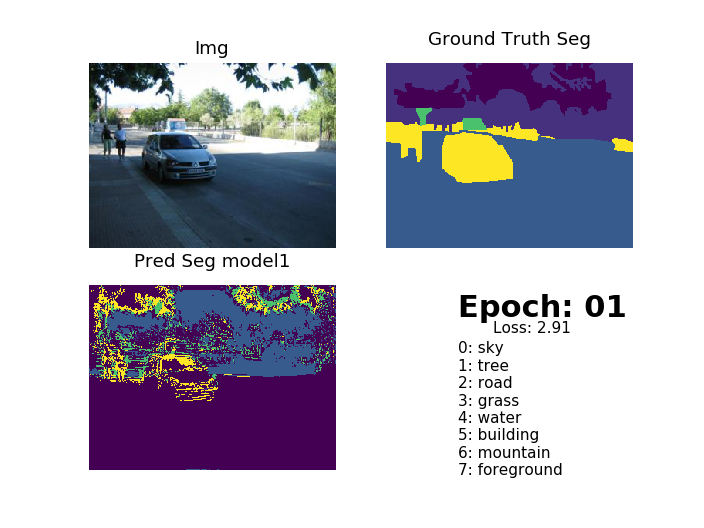

Figure saved as: result_epoch01.png
UNet-4Stage.02-1.32.hdf5
02
1.32


<IPython.core.display.Javascript object>


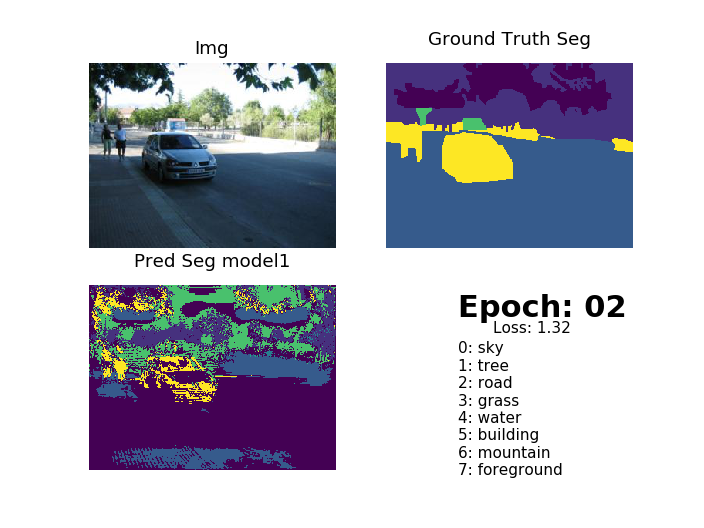

Figure saved as: result_epoch02.png
UNet-4Stage.03-1.11.hdf5
03
1.11


<IPython.core.display.Javascript object>


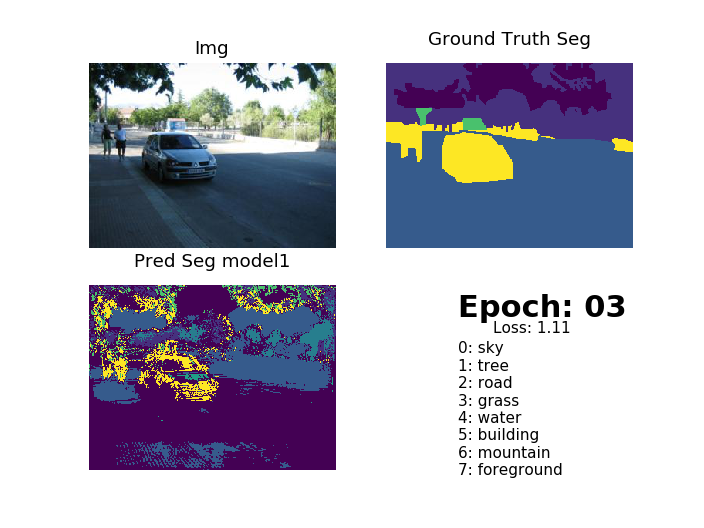

Figure saved as: result_epoch03.png
UNet-4Stage.04-1.06.hdf5
04
1.06


<IPython.core.display.Javascript object>


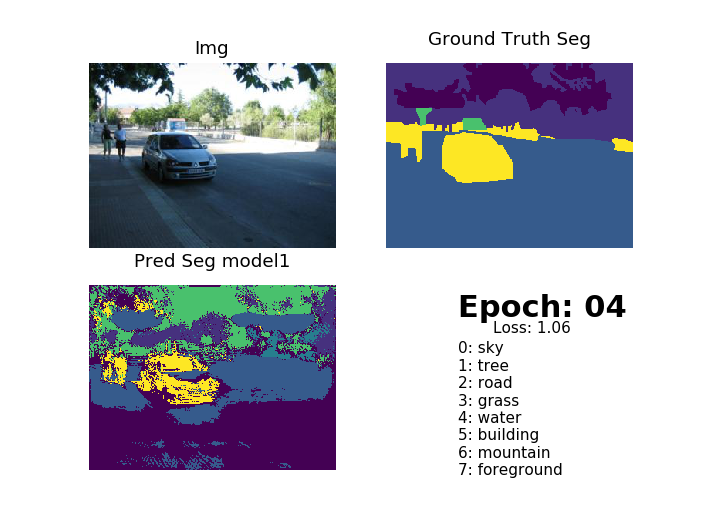

Figure saved as: result_epoch04.png
UNet-4Stage.05-1.01.hdf5
05
1.01


<IPython.core.display.Javascript object>


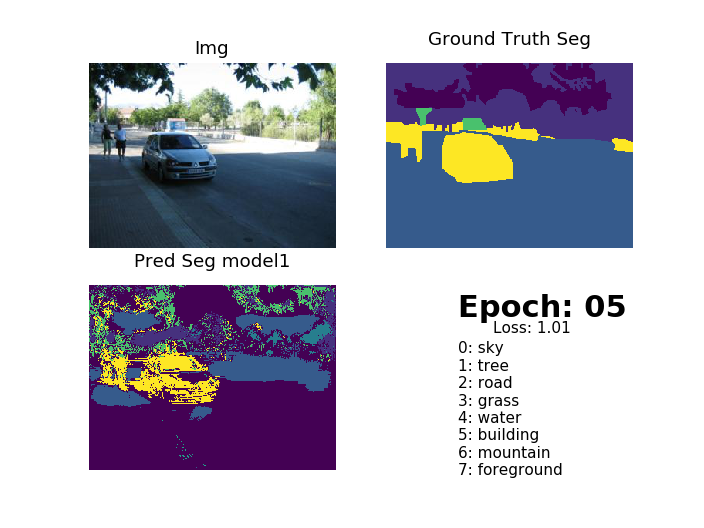

Figure saved as: result_epoch05.png
UNet-4Stage.06-0.97.hdf5
06
0.97


<IPython.core.display.Javascript object>


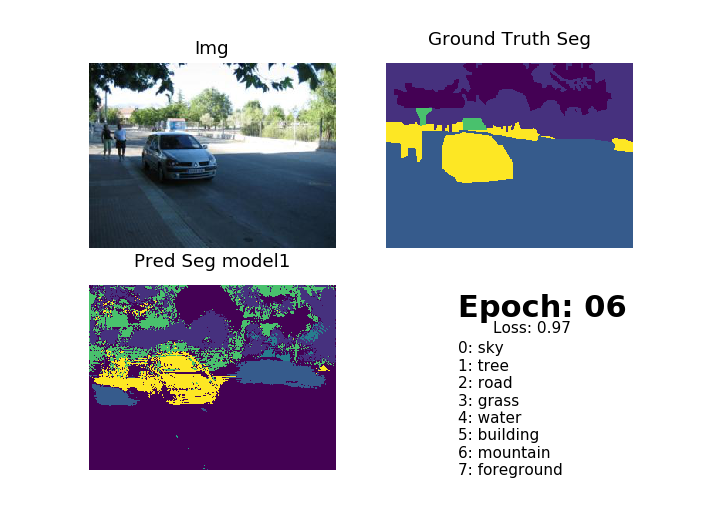

Figure saved as: result_epoch06.png
UNet-4Stage.07-0.92.hdf5
07
0.92


<IPython.core.display.Javascript object>


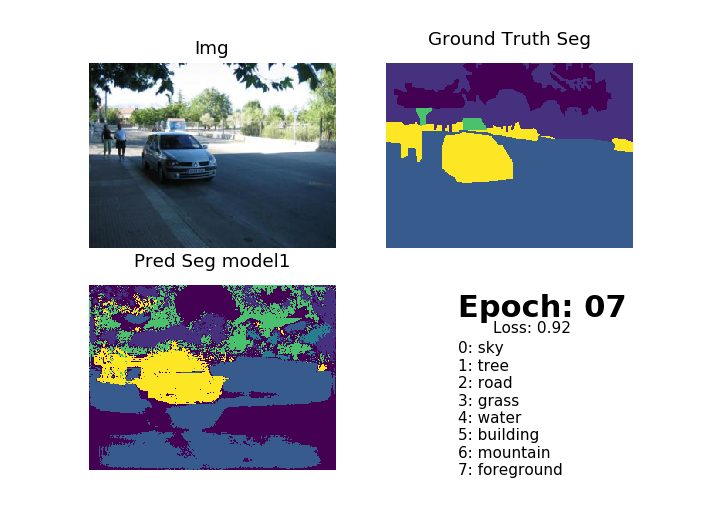

Figure saved as: result_epoch07.png
UNet-4Stage.08-0.91.hdf5
08
0.91


<IPython.core.display.Javascript object>


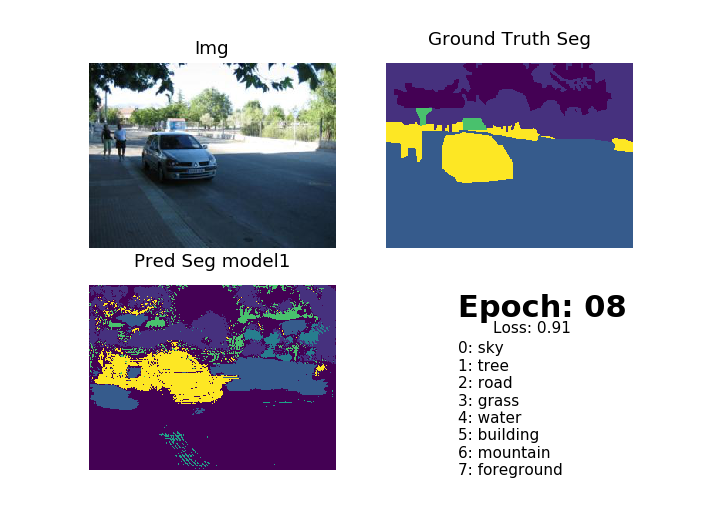

Figure saved as: result_epoch08.png
UNet-4Stage.09-0.88.hdf5
09
0.88


<IPython.core.display.Javascript object>


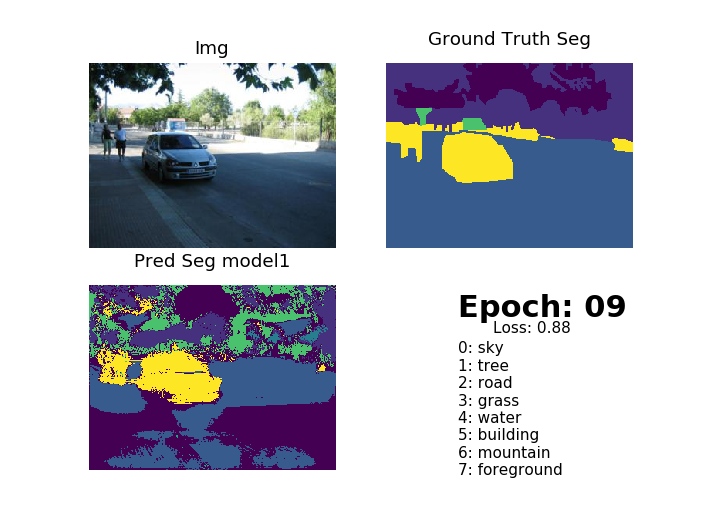

Figure saved as: result_epoch09.png
UNet-4Stage.10-0.85.hdf5
10
0.85


<IPython.core.display.Javascript object>


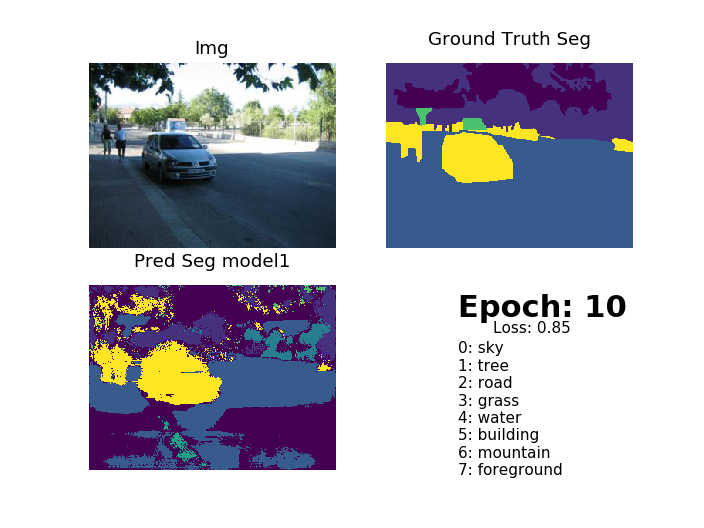

Figure saved as: result_epoch10.png
UNet-4Stage.10-0.87.hdf5
10
0.87


<IPython.core.display.Javascript object>


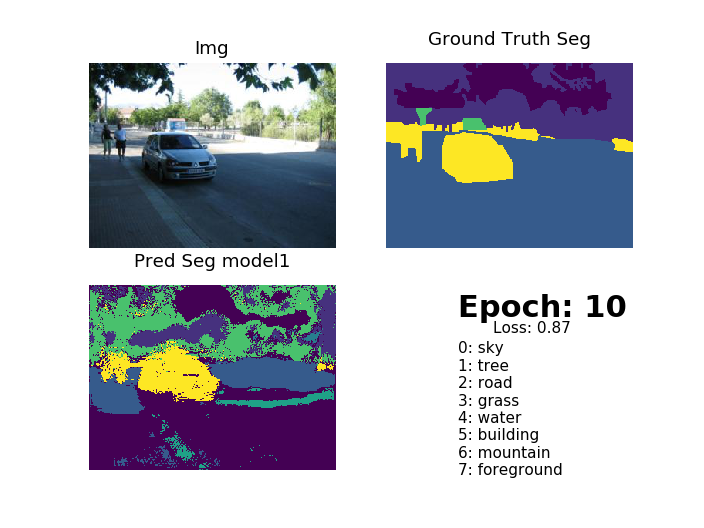

Figure saved as: result_epoch10.png
UNet-4Stage.20-0.70.hdf5
20
0.70


<IPython.core.display.Javascript object>


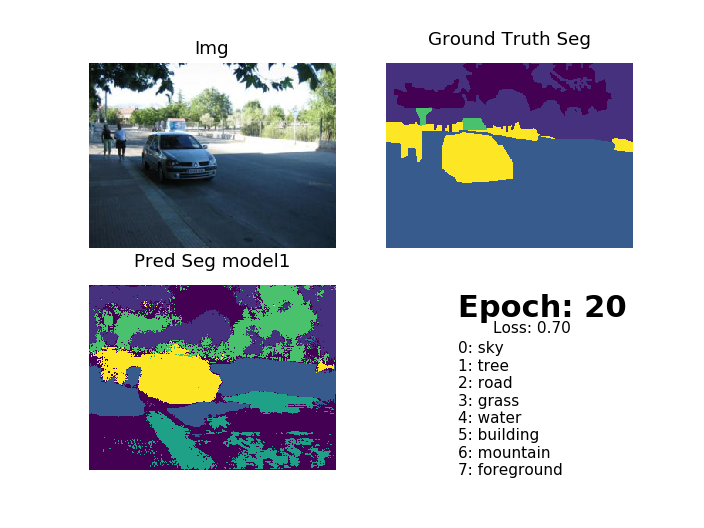

Figure saved as: result_epoch20.png
UNet-4Stage.30-0.56.hdf5
30
0.56


<IPython.core.display.Javascript object>


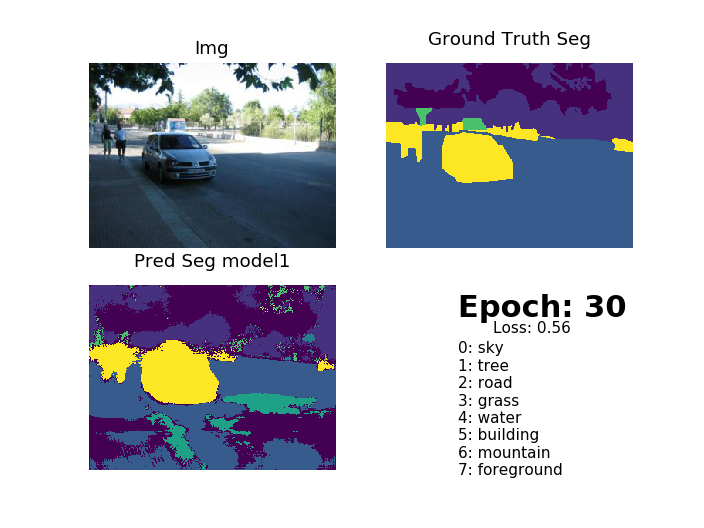

Figure saved as: result_epoch30.png
UNet-4Stage.40-0.44.hdf5
40
0.44


<IPython.core.display.Javascript object>


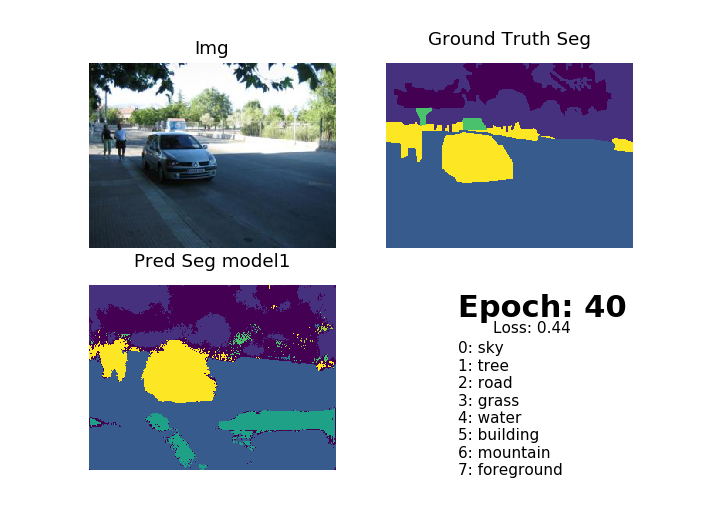

Figure saved as: result_epoch40.png
UNet-4Stage.50-0.29.hdf5
50
0.29


<IPython.core.display.Javascript object>


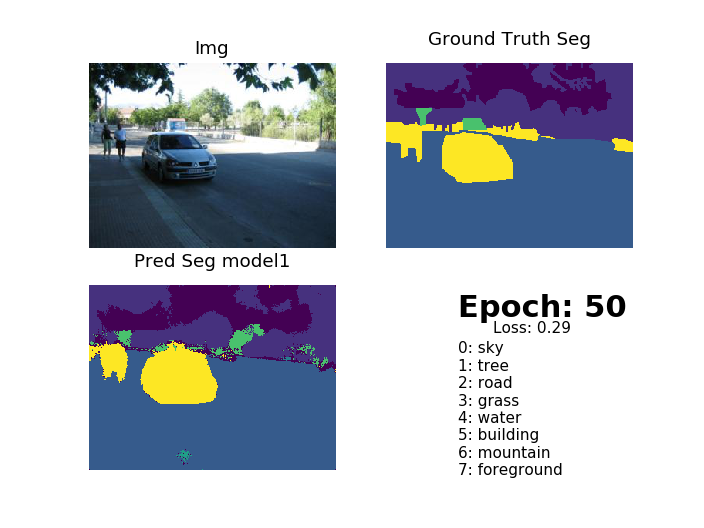

Figure saved as: result_epoch50.png


In [113]:
for i in range(len(list_of_weights)):

    weights_num = i
    print(list_of_weights[weights_num])
    model_1.load_weights(os.path.join(weights_path_forgif, list_of_weights[weights_num]))

    pred1 = model_1.predict(all_imgs[image_num:image_num+1])[0]

    combined_pred1 = np.zeros(pred1.shape[:-1])
    for lays in range(pred1.shape[-1]):
        combined_pred1 += np.round(pred1[:,:,lays])* lays

    epoch = str(list_of_weights[weights_num].split(".")[1].split("-")[0])
    loss = str(list_of_weights[weights_num].split(".")[1].split("-")[1] + "." + list_of_weights[weights_num].split(".")[2])

    print(epoch)
    print(loss)

    # for plotting (layers analysis)
    img = all_imgs[image_num]
    mask = all_masks[image_num]
    lay = 1
    fig, ax = plt.subplots(2,2)

    ax[0,0].imshow((img))
    ax[0,0].set_axis_off()
    ax[0,0].set_title('Img')

    ax[0,1].matshow(mask)
    ax[0,1].set_axis_off()
    ax[0,1].set_title('Ground Truth Seg')

    ax[1,0].matshow(combined_pred1)
    ax[1,0].set_axis_off()
    ax[1,0].set_title('Pred Seg model1')

    ax[1,1].set_axis_off()

    text = '0: sky \n1: tree \n2: road\n3: grass\n4: water\n5: building\n6: mountain\n7: foreground'
    fig.text(0.65,0.1,text)
    fig.text(0.7,0.37,"Loss: {}".format(loss))
    fig.text(0.65,0.4,"Epoch: {}".format(epoch),fontsize=20, fontweight='bold')

    fig.savefig("result_epoch{}.png".format(epoch))
    print("Figure saved as: result_epoch{}.png".format(epoch))

# Testing

In [27]:
weights_path = os.path.join(os.getcwd(),'weights')
weights_path_forgif = os.path.join(weights_path, 'for_gif')

list_of_weights = os.listdir(weights_path_forgif)
list_of_weights.sort()
list_of_weights

['UNet-4Stage.01-2.91.hdf5',
 'UNet-4Stage.02-1.32.hdf5',
 'UNet-4Stage.03-1.11.hdf5',
 'UNet-4Stage.04-1.06.hdf5',
 'UNet-4Stage.05-1.01.hdf5',
 'UNet-4Stage.06-0.97.hdf5',
 'UNet-4Stage.07-0.92.hdf5',
 'UNet-4Stage.08-0.91.hdf5',
 'UNet-4Stage.09-0.88.hdf5',
 'UNet-4Stage.10-0.85.hdf5',
 'UNet-4Stage.10-0.87.hdf5',
 'UNet-4Stage.20-0.70.hdf5',
 'UNet-4Stage.30-0.56.hdf5',
 'UNet-4Stage.40-0.44.hdf5',
 'UNet-4Stage.50-0.29.hdf5']

In [28]:
weights_num = 0

model_1.load_weights(os.path.join(weights_path_forgif, list_of_weights[weights_num]))

<IPython.core.display.Javascript object>


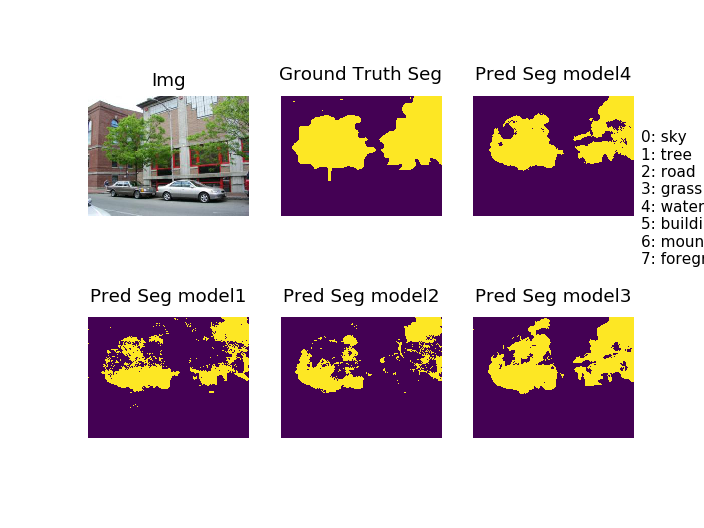

Text(0.91,0.5,'0: sky \n1: tree \n2: road\n3: grass\n4: water\n5: building\n6: mountain\n7: foreground')

In [53]:
# for plotting (layers analysis)
img = all_imgs[image_num]
mask_oneHot = all_masks_oneHot[image_num]
lay = 1
fig, ax = plt.subplots(2,3)

ax[0,0].imshow((img))
ax[0,0].set_axis_off()
ax[0,0].set_title('Img')

ax[0,1].matshow(mask_oneHot[:,:,lay])
ax[0,1].set_axis_off()
ax[0,1].set_title('Ground Truth Seg')

ax[1,0].matshow(np.round(pred1[:,:,lay]))
ax[1,0].set_axis_off()
ax[1,0].set_title('Pred Seg model1')

ax[1,1].matshow(np.round(pred2[:,:,lay]))
ax[1,1].set_axis_off()
ax[1,1].set_title('Pred Seg model2')

ax[1,2].matshow(np.round(pred3[:,:,lay]))
ax[1,2].set_axis_off()
ax[1,2].set_title('Pred Seg model3')

ax[0,2].matshow(np.round(pred4[:,:,lay]))
ax[0,2].set_axis_off()
ax[0,2].set_title('Pred Seg model4')

text = '0: sky \n1: tree \n2: road\n3: grass\n4: water\n5: building\n6: mountain\n7: foreground'
fig.text(0.91,0.5,text)

In [16]:
# loading the weights
counter = 0
lowest_loss = 10.0
weights_path = os.path.join(os.getcwd(),'weights')
weights_path1 = os.path.join(weights_path, 'first_training_epoch10')
weights_path2 = os.path.join(weights_path, 'fifth_training_epoch50_UNET_5_stage')
# weights_path3 = os.path.join(weights_path, 'third_training_epoch50_sigmoid')
# weights_path4 = os.path.join(weights_path, 'fourth_training_epoch50_softmax')


for weights in os.listdir(weights_path1):
    
    if float(weights.split('hdf5')[0].split('-')[-1][:-1]) <= lowest_loss:
        lowest_loss = float(weights.split('hdf5')[0].split('-')[-1][:-1])
        best_weights1 = os.listdir(weights_path1)[counter]
    counter +=1
    print(counter)
    print('best_weights1: ', best_weights1)

lowest_loss = 10.0
counter = 0
for weights in os.listdir(weights_path2):
    
    if float(weights.split('hdf5')[0].split('-')[-1][:-1]) <= lowest_loss:
        lowest_loss = float(weights.split('hdf5')[0].split('-')[-1][:-1])
        best_weights2 = os.listdir(weights_path2)[counter]
    counter +=1
    print(counter)
    print('best_weights2: ', best_weights2)
    
# lowest_loss = 10.0
# counter = 0
# for weights in os.listdir(weights_path3):
    
#     if float(weights.split('hdf5')[0].split('-')[-1][:-1]) <= lowest_loss:
#         lowest_loss = float(weights.split('hdf5')[0].split('-')[-1][:-1])
#         best_weights3 = os.listdir(weights_path3)[counter]
#     counter +=1
#     print(counter)
#     print('best_weights3: ', best_weights3)
    
# lowest_loss = 10.0
# counter = 0
# for weights in os.listdir(weights_path4):
    
#     if float(weights.split('hdf5')[0].split('-')[-1][:-1]) <= lowest_loss:
#         lowest_loss = float(weights.split('hdf5')[0].split('-')[-1][:-1])
#         best_weights4 = os.listdir(weights_path4)[counter]
#     counter +=1
#     print(counter)
#     print('best_weights4: ', best_weights4)

1
best_weights1:  UNet-4Stage.03-1.11.hdf5
2
best_weights1:  UNet-4Stage.03-1.11.hdf5
3
best_weights1:  UNet-4Stage.07-0.92.hdf5
4
best_weights1:  UNet-4Stage.07-0.92.hdf5
5
best_weights1:  UNet-4Stage.07-0.92.hdf5
6
best_weights1:  UNet-4Stage.08-0.91.hdf5
7
best_weights1:  UNet-4Stage.08-0.91.hdf5
8
best_weights1:  UNet-4Stage.09-0.88.hdf5
9
best_weights1:  UNet-4Stage.10-0.85.hdf5
10
best_weights1:  UNet-4Stage.10-0.85.hdf5
1
best_weights2:  UNet.01-3.31.hdf5


In [17]:
model_2.load_weights(os.path.join(weights_path2, best_weights2))

OSError: Unable to open file (truncated file: eof = 135794416, sblock->base_addr = 0, stored_eof = 138140928)

In [18]:
model_1.load_weights(os.path.join(weights_path1, best_weights1))
# model_2.load_weights(os.path.join(weights_path2, best_weights2))
# model_3.load_weights(os.path.join(weights_path3, best_weights3))
# model_4.load_weights(os.path.join(weights_path4, best_weights4))

In [17]:
len(all_imgs)

531

In [50]:
image_num = np.random.randint(0,len(all_imgs))
print("image num: ", image_num)
pred1 = model_1.predict(all_imgs[image_num:image_num+1])[0]
pred2 = model_2.predict(all_imgs[image_num:image_num+1])[0]
pred3 = model_3.predict(all_imgs[image_num:image_num+1])[0]
pred4 = model_4.predict(all_imgs[image_num:image_num+1])[0]

image num:  467


In [38]:
# print(pred1.shape)
# print(pred1[0,0,:].sum())
# print(pred1[1,0,:])
print(pred3.shape)
print(pred3[0,0,:].sum())
print(pred3[1,0,:])
print(pred4.shape)
print(pred4[0,0,:].sum())
print(pred4[1,0,:])

(240, 320, 8)
1.0000001
[9.9846786e-01 8.3416991e-04 7.3645042e-06 4.1761134e-05 2.1600311e-04
 3.6791105e-05 1.7081175e-04 2.2514728e-04]
(240, 320, 8)
0.9999999
[9.80426073e-01 3.59911821e-03 1.61277212e-03 7.98903697e-04
 2.32494459e-03 6.07143901e-03 1.08354594e-04 5.05838450e-03]


<IPython.core.display.Javascript object>


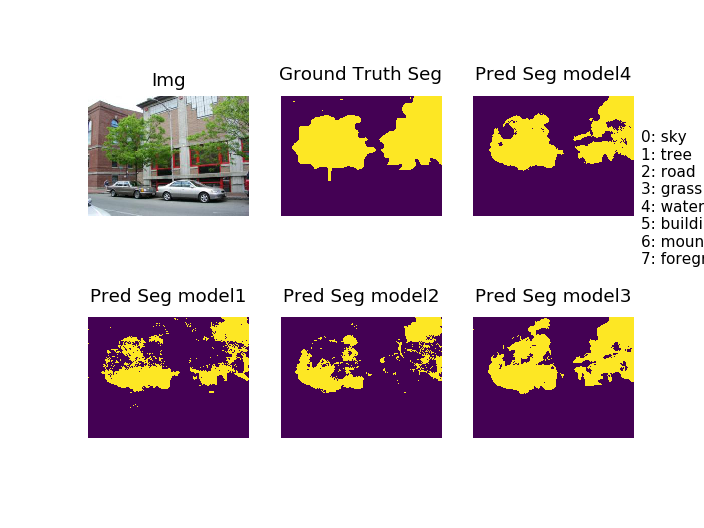

Text(0.91,0.5,'0: sky \n1: tree \n2: road\n3: grass\n4: water\n5: building\n6: mountain\n7: foreground')

In [53]:
# for plotting (layers analysis)
img = all_imgs[image_num]
mask_oneHot = all_masks_oneHot[image_num]
lay = 1
fig, ax = plt.subplots(2,3)

ax[0,0].imshow((img))
ax[0,0].set_axis_off()
ax[0,0].set_title('Img')

ax[0,1].matshow(mask_oneHot[:,:,lay])
ax[0,1].set_axis_off()
ax[0,1].set_title('Ground Truth Seg')

ax[1,0].matshow(np.round(pred1[:,:,lay]))
ax[1,0].set_axis_off()
ax[1,0].set_title('Pred Seg model1')

ax[1,1].matshow(np.round(pred2[:,:,lay]))
ax[1,1].set_axis_off()
ax[1,1].set_title('Pred Seg model2')

ax[1,2].matshow(np.round(pred3[:,:,lay]))
ax[1,2].set_axis_off()
ax[1,2].set_title('Pred Seg model3')

ax[0,2].matshow(np.round(pred4[:,:,lay]))
ax[0,2].set_axis_off()
ax[0,2].set_title('Pred Seg model4')

text = '0: sky \n1: tree \n2: road\n3: grass\n4: water\n5: building\n6: mountain\n7: foreground'
fig.text(0.91,0.5,text)

In [37]:
all_masks[image_num].shape

(240, 320)

<IPython.core.display.Javascript object>


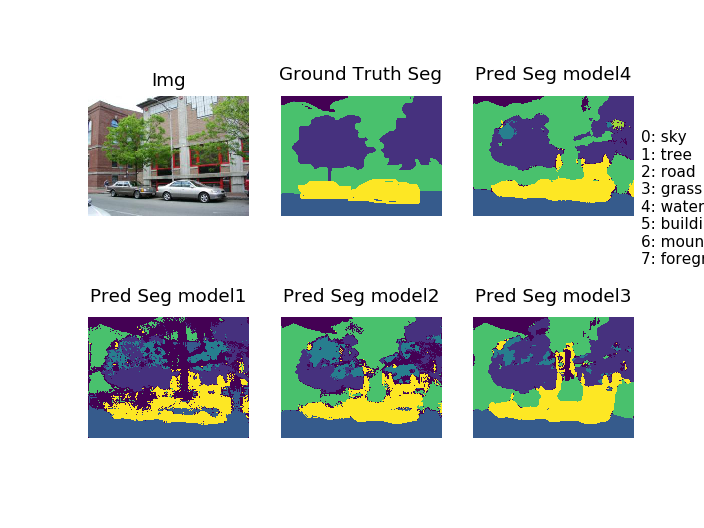

In [51]:
# Combining the layers together
combined_pred1 = np.zeros(pred1.shape[:-1])
for lays in range(pred1.shape[-1]):
    combined_pred1 += np.round(pred1[:,:,lays])* lays

combined_pred2 = np.zeros(pred2.shape[:-1])
for lays in range(pred2.shape[-1]):
    combined_pred2 += np.round(pred2[:,:,lays])* lays

combined_pred3 = np.zeros(pred3.shape[:-1])
for lays in range(pred3.shape[-1]):
    combined_pred3 += np.round(pred3[:,:,lays])* lays
    
combined_pred4 = np.zeros(pred4.shape[:-1])
for lays in range(pred4.shape[-1]):
    combined_pred4 += np.round(pred4[:,:,lays])* lays

# combined_pred1 + np.round(pred1[:,:,0])
    
mask = all_masks[image_num]
fig,ax = plt.subplots(2,3)

ax[0,0].imshow((all_imgs[image_num]))
ax[0,0].set_axis_off()
ax[0,0].set_title('Img')

ax[0,1].matshow(mask)
ax[0,1].set_axis_off()
ax[0,1].set_title('Ground Truth Seg')

ax[1,0].matshow(combined_pred1)
ax[1,0].set_axis_off()
ax[1,0].set_title('Pred Seg model1')

ax[1,1].matshow(combined_pred2)
ax[1,1].set_axis_off()
ax[1,1].set_title('Pred Seg model2')

ax[1,2].matshow(combined_pred3)
ax[1,2].set_axis_off()
ax[1,2].set_title('Pred Seg model3')

ax[0,2].matshow(combined_pred4)
ax[0,2].set_axis_off()
ax[0,2].set_title('Pred Seg model4')


text = '0: sky \n1: tree \n2: road\n3: grass\n4: water\n5: building\n6: mountain\n7: foreground'
fig.text(0.91,0.5,text)
fig.savefig('pictures/result/Image-{}'.format(image_num))